# **Analysis on suspicious scores**

## *Loading Data*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

yearwork_scores = pd.read_excel('YearWork.xlsx')
midterm_scores = pd.read_excel('Midterm_scores.xlsx')
students = pd.read_excel('Students_list.xlsx')
students = pd.merge(students, midterm_scores, on='ID')
students = pd.merge(students, yearwork_scores, on='ID')

In [2]:
students['diff'] = students.TOT - students.MID
students['bonus'] = students.NEW_TOT - students.TOT
students['yw_diff'] = students.NEW_TOT - students.MID
students = students.dropna()

In [3]:
students.drop('ID', axis=1).describe()

,MID,TOT,NEW_TOT,diff,bonus,yw_diff
count,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000
mean,20.320346,25.580087,30.580087,5.259740,5.000000,10.259740
std,4.641165,6.641198,5.087183,7.396949,3.095579,4.943338
min,1.000000,9.000000,14.000000,-7.000000,0.000000,1.000000
25%,18.000000,20.000000,28.000000,-2.000000,2.000000,6.000000
50%,22.000000,26.000000,30.000000,5.000000,5.000000,9.000000
75%,24.000000,30.500000,34.000000,12.000000,8.000000,14.000000
max,27.000000,40.000000,40.000000,25.000000,14.000000,26.000000


## *Distribution of Midterm Scores*

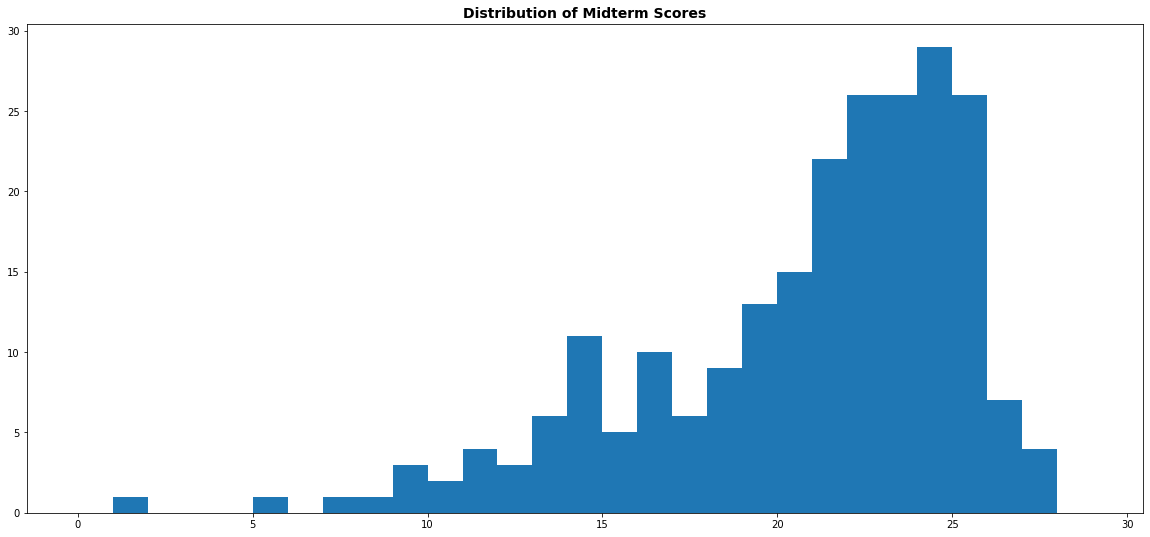

In [4]:
figure = plt.figure(figsize=(20,9))
bins = range(0,30,1)
_ = plt.hist(students.MID, bins= bins)
_ = plt.title("Distribution of Midterm Scores", fontweight='bold', fontsize=14)

## *Distribution of Year Work Scores (Before Adding Bonus)*

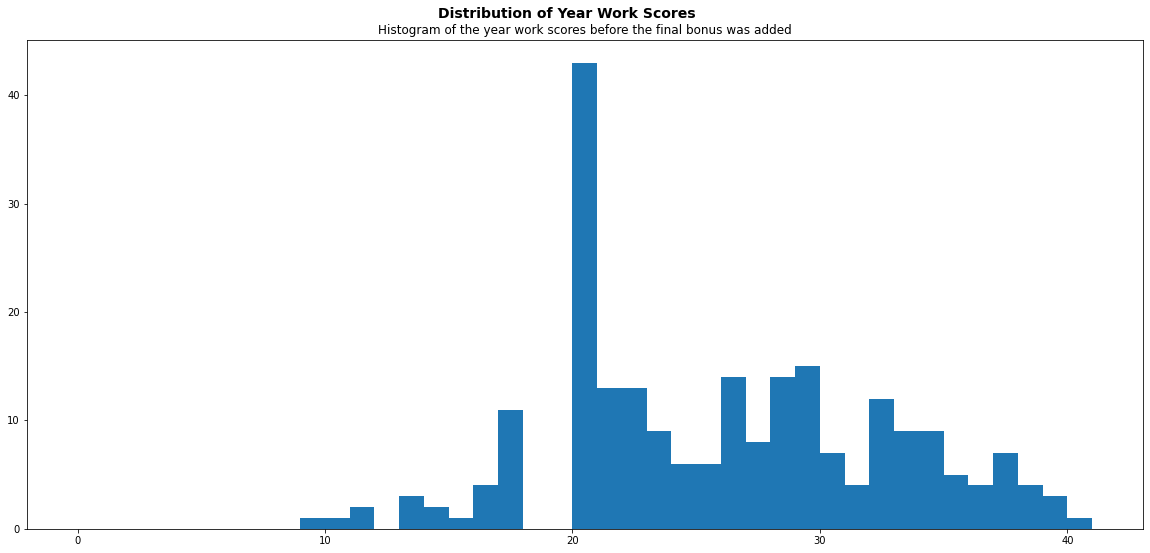

In [5]:
figure = plt.figure(figsize=(20,9))
bins = range(0,42,1)
_ = plt.hist(students.TOT, bins= bins)
_ = plt.suptitle("Distribution of Year Work Scores", fontweight='bold', fontsize=14, y=0.93)
_ = plt.title('Histogram of the year work scores before the final bonus was added')

### *Males vs Females*

In [6]:
f_students = students[students.Sex == 'F']
m_students = students[students.Sex == 'M']

In [7]:
def draw_MvF_histogram(column):
    _ = plt.hist(m_students[column], bins= bins, color='#293462', alpha= 0.65, density=True, label='Male Students')
    _ = plt.hist(f_students[column], bins= bins, color='#C21010', alpha= 0.6, density=True, label='Female Students')

    plt.axvline(m_students[column].mean(),
            label = 'Average for male students ({:.2f})'.format(m_students[column].mean()),
            color ='#293462',
            linestyle = 'dashed',
            linewidth = 1)

    plt.axvline(f_students[column].mean(),
            label = 'Average for female students ({:.2f})'.format(f_students[column].mean()),
            color = '#C21010',
            linestyle = 'dashed',
            linewidth = 1)

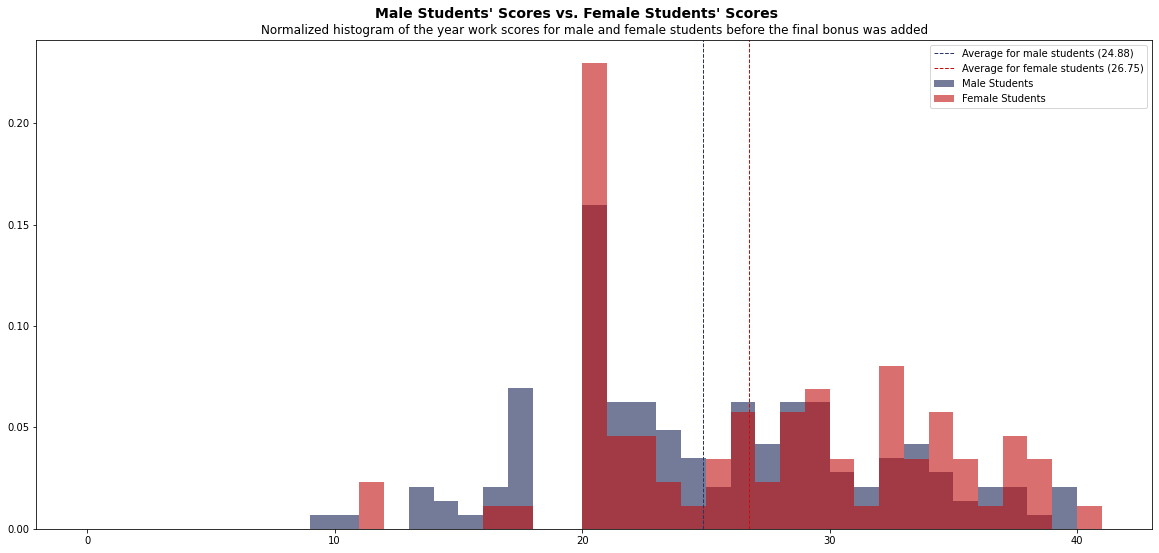

In [8]:
figure = plt.figure(figsize=(20,9))
bins = range(0,42,1)

draw_MvF_histogram('TOT')

_ = plt.legend()
_ = plt.suptitle("Male Students' Scores vs. Female Students' Scores", fontweight='bold', fontsize=14, y=0.93)
_ = plt.title('Normalized histogram of the year work scores for male and female students before the final bonus was added')

## *Midterm scores vs Year work scores*

In [9]:
mid_tot = students.groupby(['MID', 'TOT', 'Sex']).count()
mid_tot = mid_tot.reset_index().rename(columns={'ID':'Number of students'})
mid_tot.drop(['Name', 'diff'], axis=1, inplace=True)
corr = np.corrcoef(students.MID, students.TOT)
corr = corr[0][1]

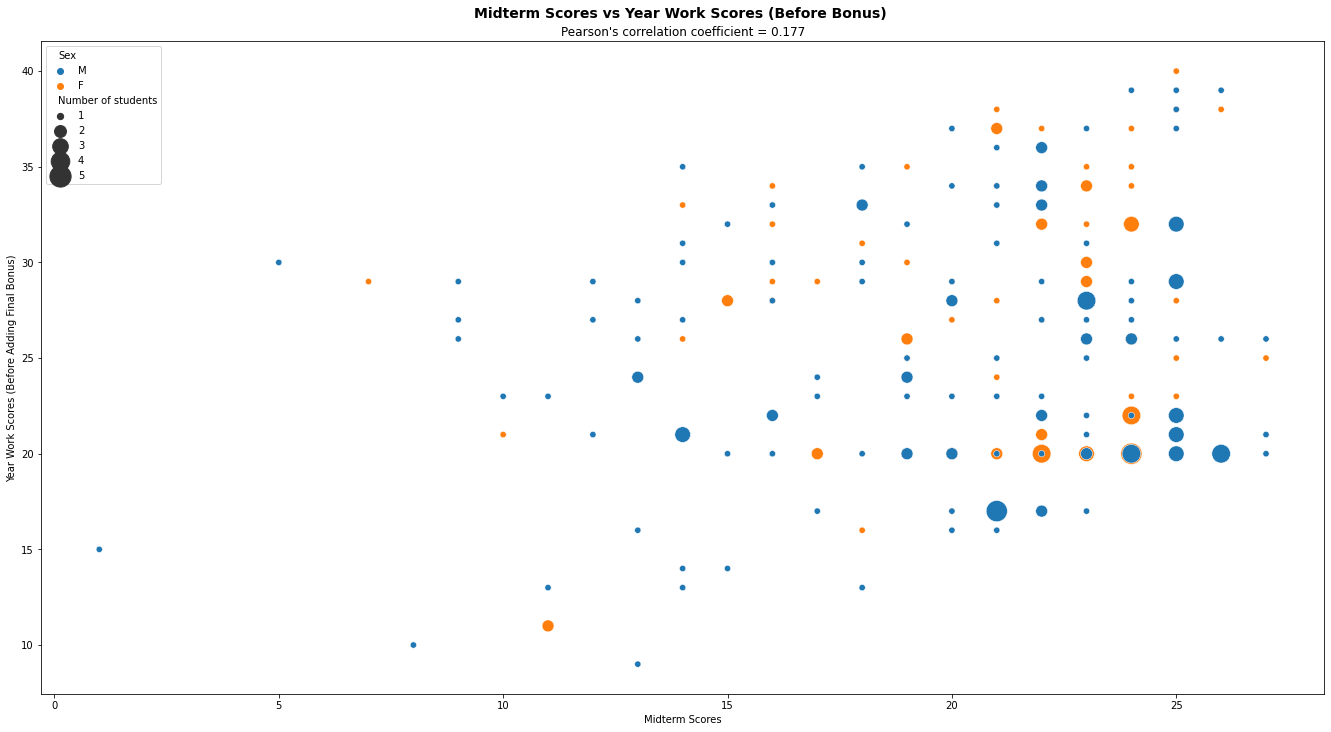

In [10]:
figure = plt.figure(figsize=(23,12))
_ = sns.scatterplot(data= mid_tot, x='MID', y='TOT', size='Number of students', hue='Sex', sizes=(40,450))
plt.xlabel('Midterm Scores')
plt.ylabel('Year Work Scores (Before Adding Final Bonus)')
_ = plt.suptitle("Midterm Scores vs Year Work Scores (Before Bonus)", fontweight='bold', fontsize=14, x=0.51105, y=0.92)
_ = plt.title("Pearson's correlation coefficient = {:.3f}".format(corr))

## *Distribution of The Difference Between Year Work Scores & Midterm Scores*

### *Difference between Year Work Scores & Midterm Scores*

In [11]:
zeroOrLess = students.query('diff <= 0')
print('Number of people who have their midterm score as their year work score OR LESS = {:.2f}% of the class'.format(len(zeroOrLess) * 100 / len(students)))

Number of people who have their midterm score as their year work score OR LESS = 35.06% of the class


Mean: 5.260
Median: 5
Max: 25
Min: -7


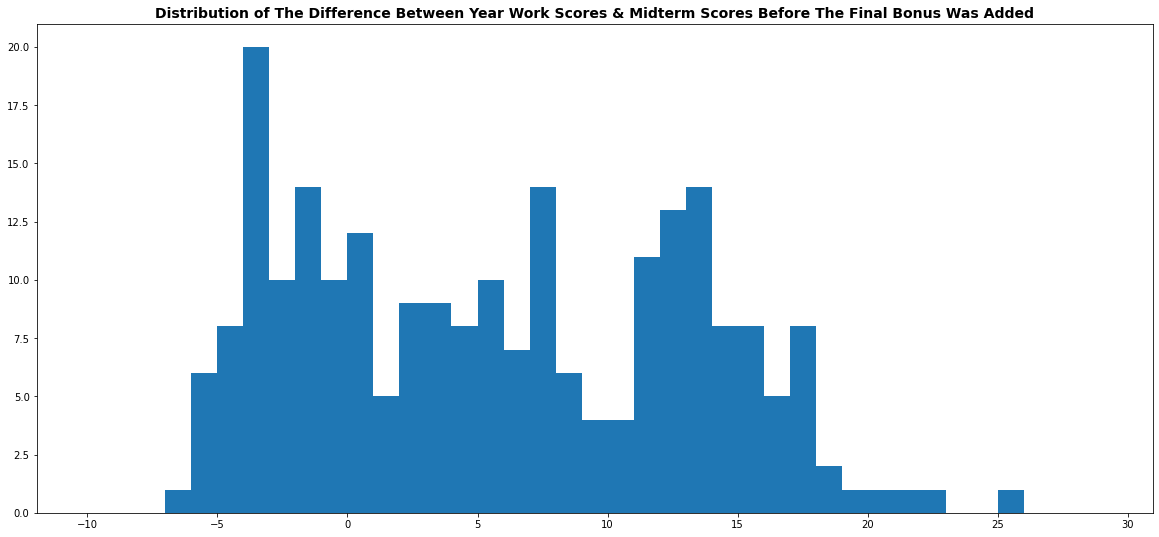

In [12]:
figure = plt.figure(figsize=(20,9))
bins = range(-10,30, 1)
_ = plt.hist(students['diff'], bins= bins)
_ = plt.title("Distribution of The Difference Between Year Work Scores & Midterm Scores Before The Final Bonus Was Added", fontweight='bold', fontsize=14)

print("Mean: {:.3f}".format(np.mean(students['diff'])))
print("Median: " + str(int(np.median(students['diff']))))
print("Max: " + str(int(np.max(students['diff']))))
print("Min: " + str(int(np.min(students['diff']))))

### *Males vs Females*

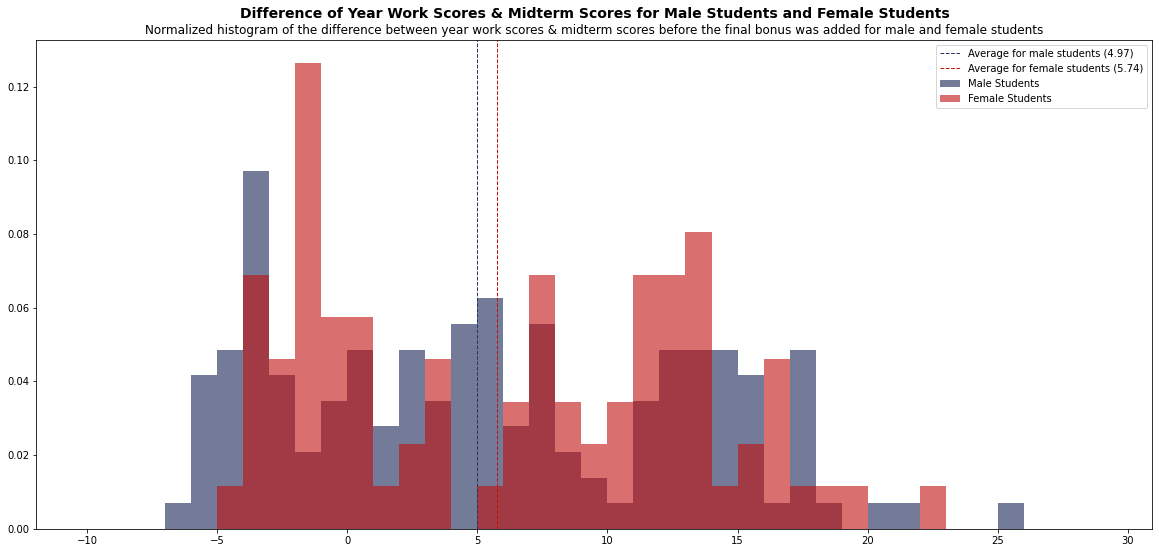

In [13]:
figure = plt.figure(figsize=(20,9))
bins = range(-10,30, 1)

draw_MvF_histogram('diff')

_ = plt.legend()
_ = plt.suptitle("Difference of Year Work Scores & Midterm Scores for Male Students and Female Students", fontweight='bold', fontsize=14, x=0.51305, y=0.93)
_ = plt.title('Normalized histogram of the difference between year work scores & midterm scores before the final bonus was added for male and female students')

## *Difference in scores VS Midterm scores*

In [14]:
diff_count = students.groupby(['diff','MID']).count()
diff_count = diff_count.reset_index()
diff_count.rename(columns={'ID':'Number of students'}, inplace=True)
diff_count = diff_count.drop(['Sex', 'Name', 'TOT'], axis=1)
corr = np.corrcoef(students['diff'], students['MID'])
corr = corr[0][1]

merg = pd.merge(diff_count, students, on=['diff', 'MID']).drop(['Name','TOT'], axis=1)

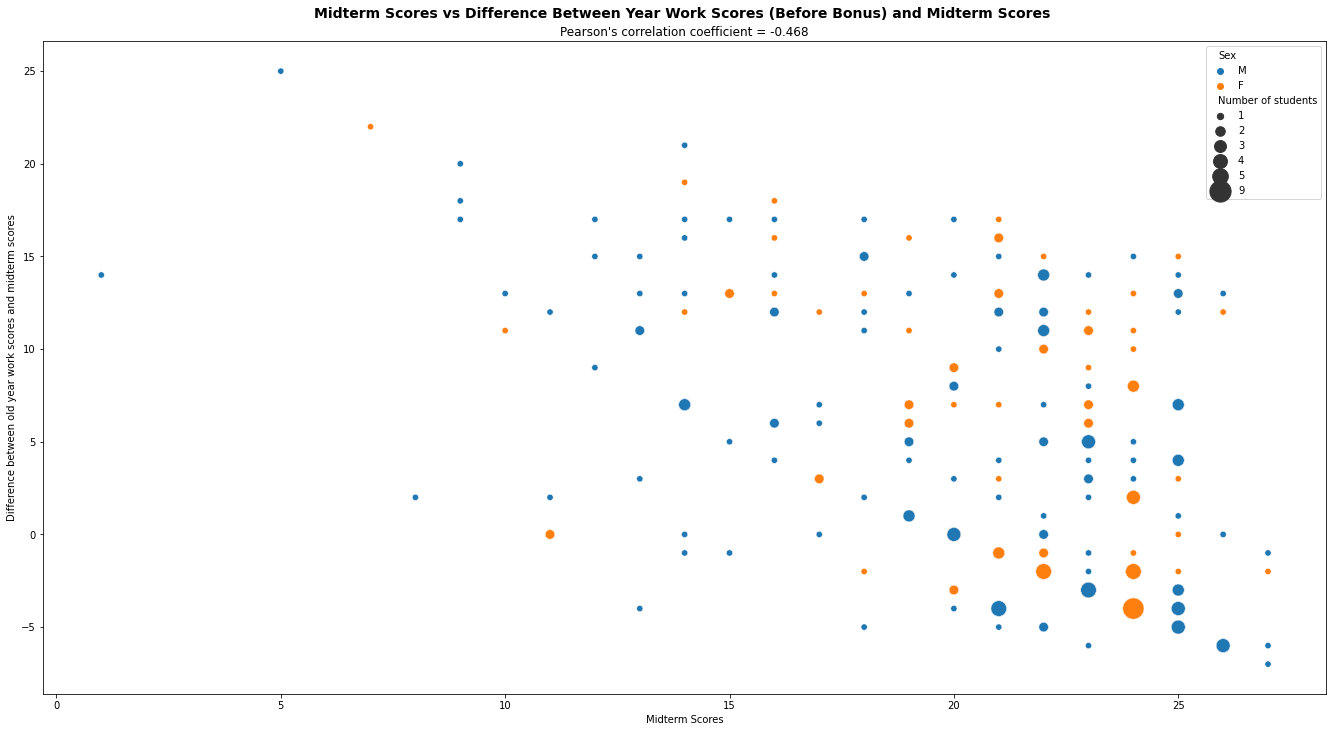

In [15]:
figure = plt.figure(figsize=(23,12))
_ = sns.scatterplot(data= merg, x='MID', y='diff', size='Number of students', hue='Sex', sizes=(40,450))
plt.xlabel('Midterm Scores')
plt.ylabel('Difference between old year work scores and midterm scores')
_ = plt.suptitle("Midterm Scores vs Difference Between Year Work Scores (Before Bonus) and Midterm Scores", fontweight='bold', fontsize=14, x=0.51105, y=0.92)
_ = plt.title("Pearson's correlation coefficient = {:.3f}".format(corr))

## *Distribution of The Bonus*

### *Distribution of the bonus*

Mean: 5.000
Max: 14
Min: 0


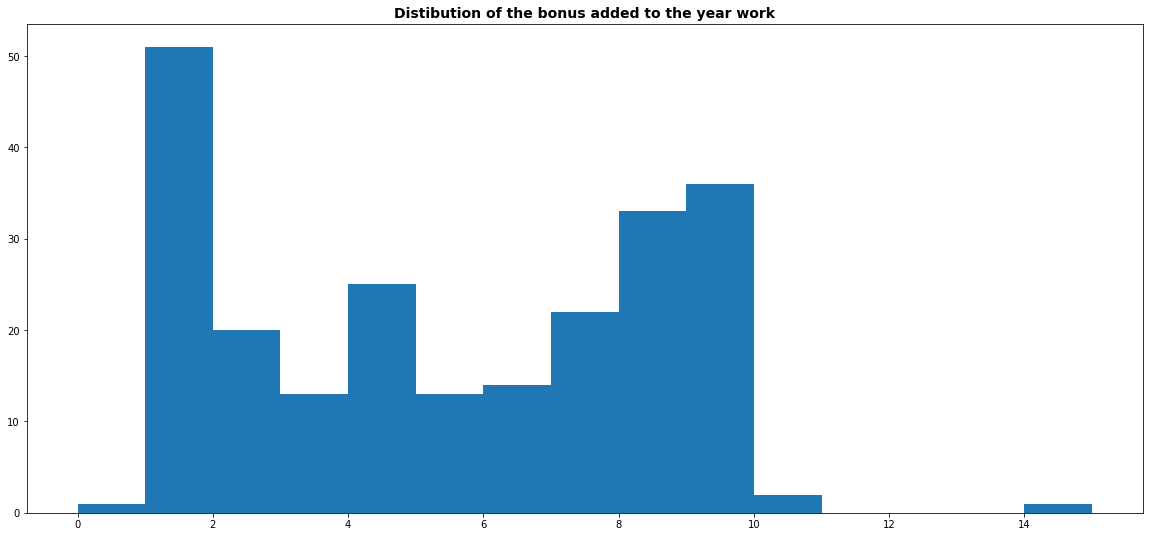

In [46]:
figure = plt.figure(figsize=(20,9))
bonus = students['bonus']
bins = range(0,16, 1)
_ = plt.hist(bonus, bins= bins)
_ = plt.title('Distibution of the bonus added to the year work', fontweight= 'bold', fontsize= 14)

print("Mean: {:.3f}".format(np.mean(bonus)))
print("Max: " + str(int(np.max(bonus))))
print("Min: " + str(int(np.min(bonus))))

### *Males vs Females*

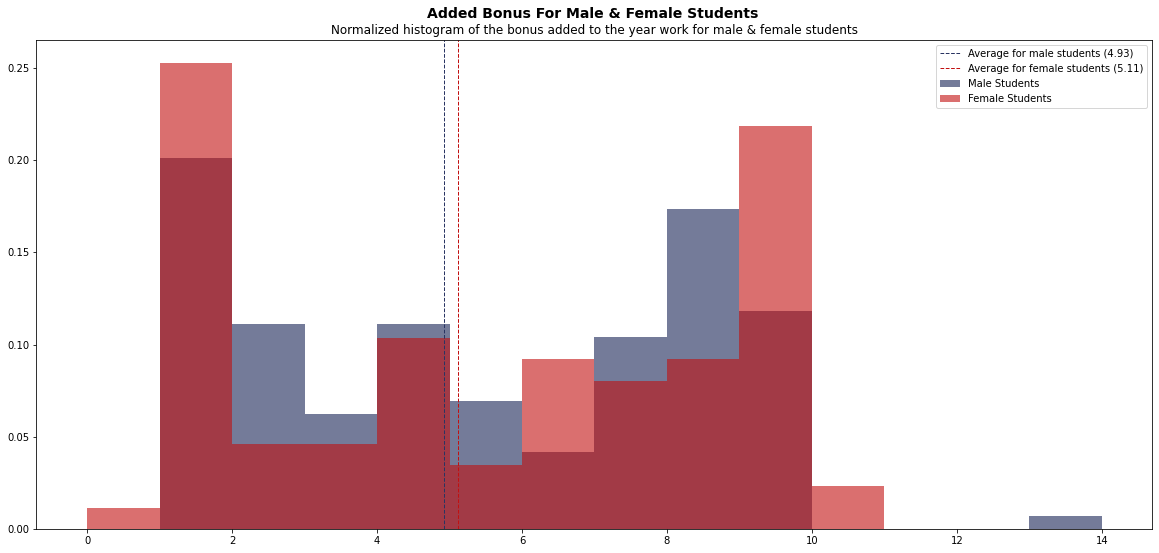

In [17]:
figure = plt.figure(figsize=(20,9))
bins = range(0,15, 1)

draw_MvF_histogram('bonus')

_ = plt.suptitle("Added Bonus For Male & Female Students", fontweight='bold', fontsize=14, x=0.51105, y=0.93)
_ = plt.title('Normalized histogram of the bonus added to the year work for male & female students')
_ = plt.legend()

### *Distribution of the total bonus added to midterm*

Mean: 10.260
Max: 26
Min: 1


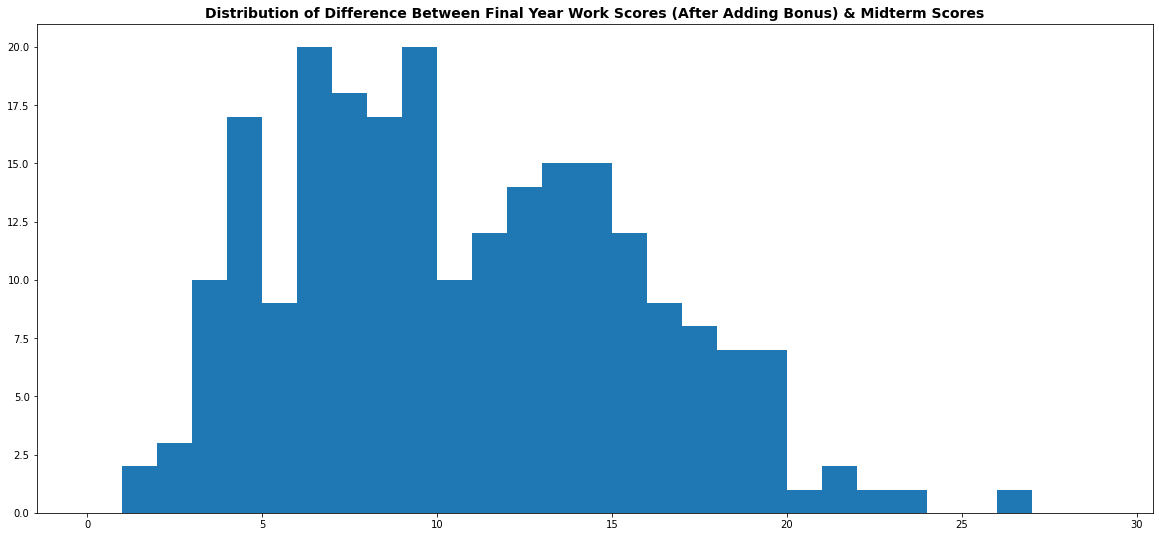

In [18]:
figure = plt.figure(figsize=(20,9))
bonus = students['yw_diff']
bins = range(0,30, 1)
_ = plt.hist(bonus, bins= bins)
plt.title('Distribution of Difference Between Final Year Work Scores (After Adding Bonus) & Midterm Scores', fontweight= 'bold', fontsize= 14)

print("Mean: {:.3f}".format(np.mean(bonus)))
print("Max: " + str(int(np.max(bonus))))
print("Min: " + str(int(np.min(bonus))))

### *Males vs Females*

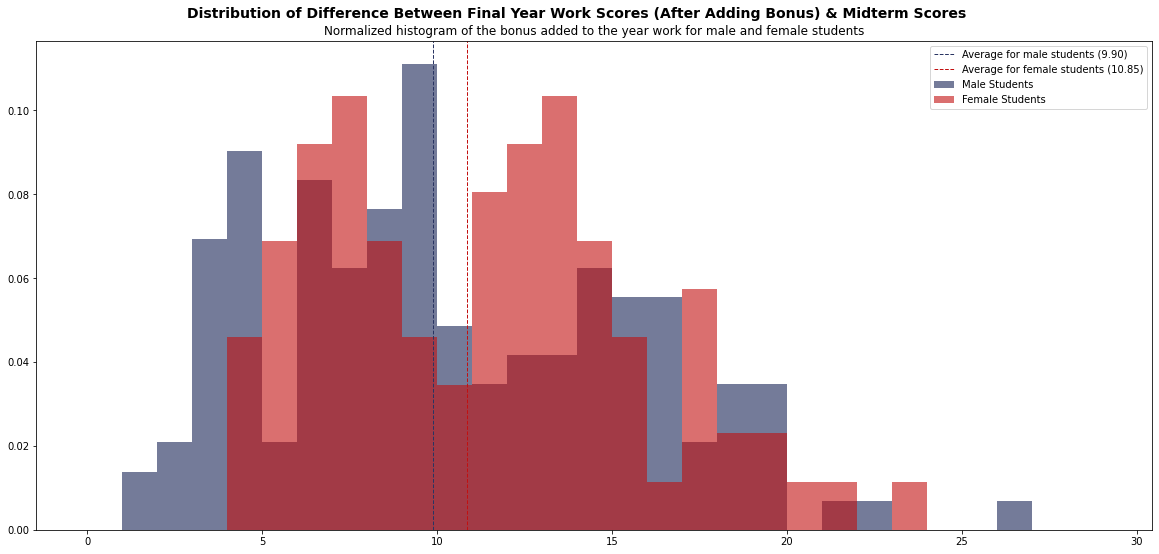

In [19]:
figure = plt.figure(figsize=(20,9))
bins = range(0,30, 1)

draw_MvF_histogram('yw_diff')

plt.suptitle('Distribution of Difference Between Final Year Work Scores (After Adding Bonus) & Midterm Scores', fontweight= 'bold', fontsize= 14, y= 0.932)
plt.title('Normalized histogram of the bonus added to the year work for male and female students')

_ = plt.legend()

## *Distribution of Final Year Work Scores (After Adding Bonus)*

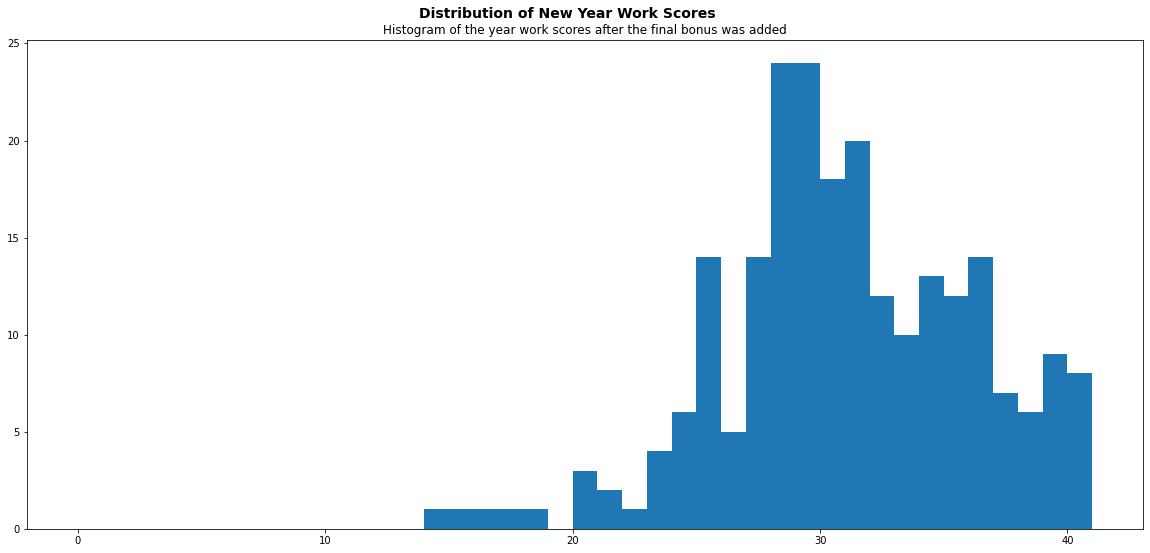

In [20]:
figure = plt.figure(figsize=(20,9))
bins = range(0,42,1)
_ = plt.hist(students.NEW_TOT, bins= bins)
_ = plt.suptitle("Distribution of New Year Work Scores", fontweight='bold', fontsize=14, y=0.93)
_ = plt.title('Histogram of the year work scores after the final bonus was added')

### *Males vs. Females*

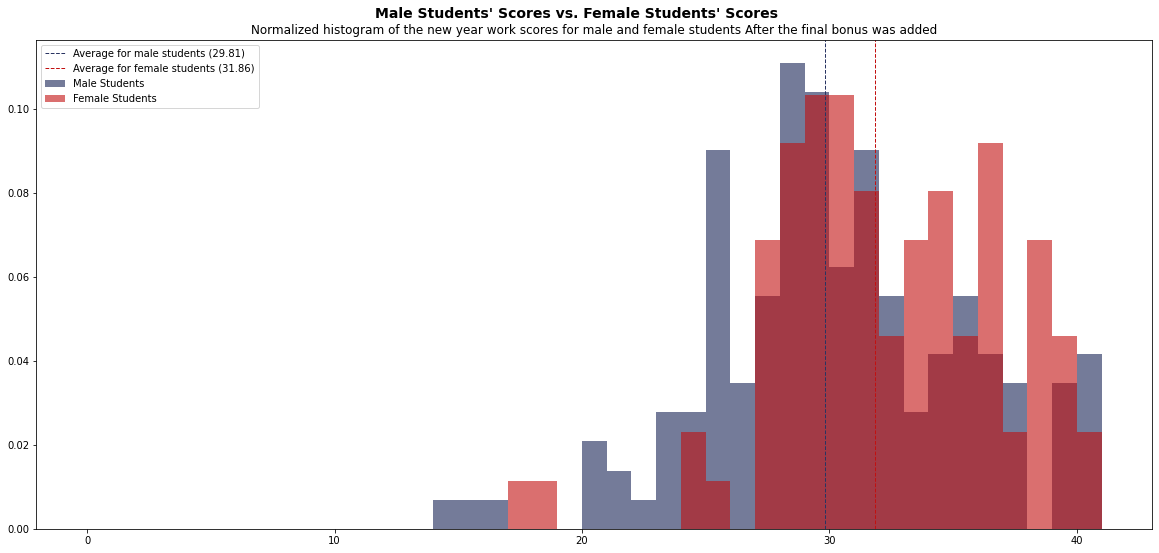

In [21]:
figure = plt.figure(figsize=(20,9))
bins = range(0,42,1)

draw_MvF_histogram('NEW_TOT')

_ = plt.legend(loc= 'upper left')
_ = plt.suptitle("Male Students' Scores vs. Female Students' Scores", fontweight='bold', fontsize=14, y=0.93)
_ = plt.title('Normalized histogram of the new year work scores for male and female students After the final bonus was added')

## *Final Year Work Scores Before & After Adding Bonus*

In [32]:
def draw_pie(column_name, colors, pctdist, labeldist, radius = 1, width = 1):
    # Divide the students into sectors
    # (0 -> 10) , (10 -> 20) , (20 -> 30) , (30 -> 40)
    
    students_sectors = []
    for score_limit in range(0,40,10):
        sector_count = len(students[(students[column_name] > score_limit) & (students[column_name] <= (score_limit + 10))])
        students_sectors.append(sector_count)

    labels = ["{} Students\n{:.2f}%".format(students_sectors[0], (students_sectors[0] * 100 / len(students))),
             "{} Students\n{:.2f}%".format(students_sectors[1], (students_sectors[1] * 100 / len(students))),
             "{} Students\n{:.2f}%".format(students_sectors[2], (students_sectors[2] * 100 / len(students))),
             "{} Students\n{:.2f}%".format(students_sectors[3], (students_sectors[3] * 100 / len(students)))]
    
    if(column_name == 'NEW_TOT'): labels[0] += "\n\n\n\n\n\n"

    plt.pie(students_sectors,
            startangle= 90,
            labels= labels,
            colors= colors,
            radius= radius,
            wedgeprops= dict(width = width, edgecolor= 'w'),
            textprops= dict(fontsize = 12, multialignment = 'center', ha= 'center'),
            pctdistance= pctdist,
            labeldistance= labeldist)
    
    if(column_name == 'TOT'):
        plt.legend(loc= 8, bbox_to_anchor= (1.78,0.432),
                   title= 'Sections',
                   labels= ['Students who scored between 0 and 10',
                            'Students who scored between 10 and 20',
                            'Students who scored between 20 and 30',
                            'Students who scored between 30 and 40'])

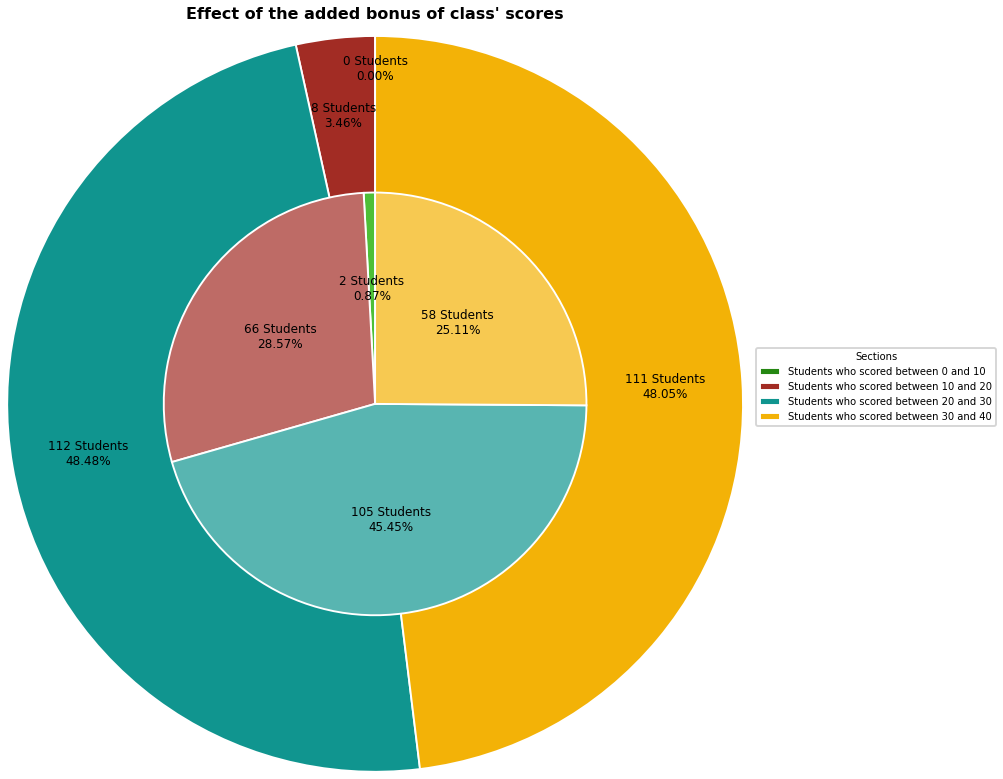

In [34]:
fig, ax= plt.subplots(figsize=(7.2,7.2))

light_shades = ['#4ebf37', '#be6b66', '#58b5b1', '#f7c951']
dark_shades = ['#258712', '#a22c24', '#10958f', '#f3b207']
draw_pie('NEW_TOT', dark_shades, 2, 0.79, 2.35, 2.5)
draw_pie('TOT', light_shades, 2,  0.55, 1.35, 1.35)
_ = plt.title("Effect of the added bonus of class' scores", fontweight= 'bold', fontsize= 16, y= 1.47)
plt.rcParams['patch.linewidth'] = 1.9

## *Final Year Work Analysis*

### *Setting the data to be visualized*

In [24]:
mid_bonus = (students.groupby(['MID','bonus'])
.count()
.reset_index()
.drop(['Name','TOT','NEW_TOT','diff','yw_diff'], axis=1))

mid_bonus.rename(columns={'ID':'Number of students'}, inplace=True)
mid_b_mean = students.groupby(['MID']).mean()['bonus'].reset_index()

diff_bonus = (students.groupby(['diff','bonus'])
.count()
.reset_index()
.drop(['Name','TOT','NEW_TOT','MID','yw_diff'], axis=1))

diff_bonus.rename(columns={'ID':'Number of students'}, inplace=True)
diff_b_mean = students.groupby(['diff']).mean()['bonus'].reset_index()

TOT_bonus = (students.groupby(['TOT','bonus'])
.count()
.reset_index()
.drop(['Name','diff','NEW_TOT','MID','yw_diff'], axis=1))

TOT_bonus.rename(columns={'ID':'Number of students'}, inplace=True)
TOT_b_mean = students.groupby(['TOT']).mean()['bonus'].reset_index()

### *Old Year Work vs Bonus*

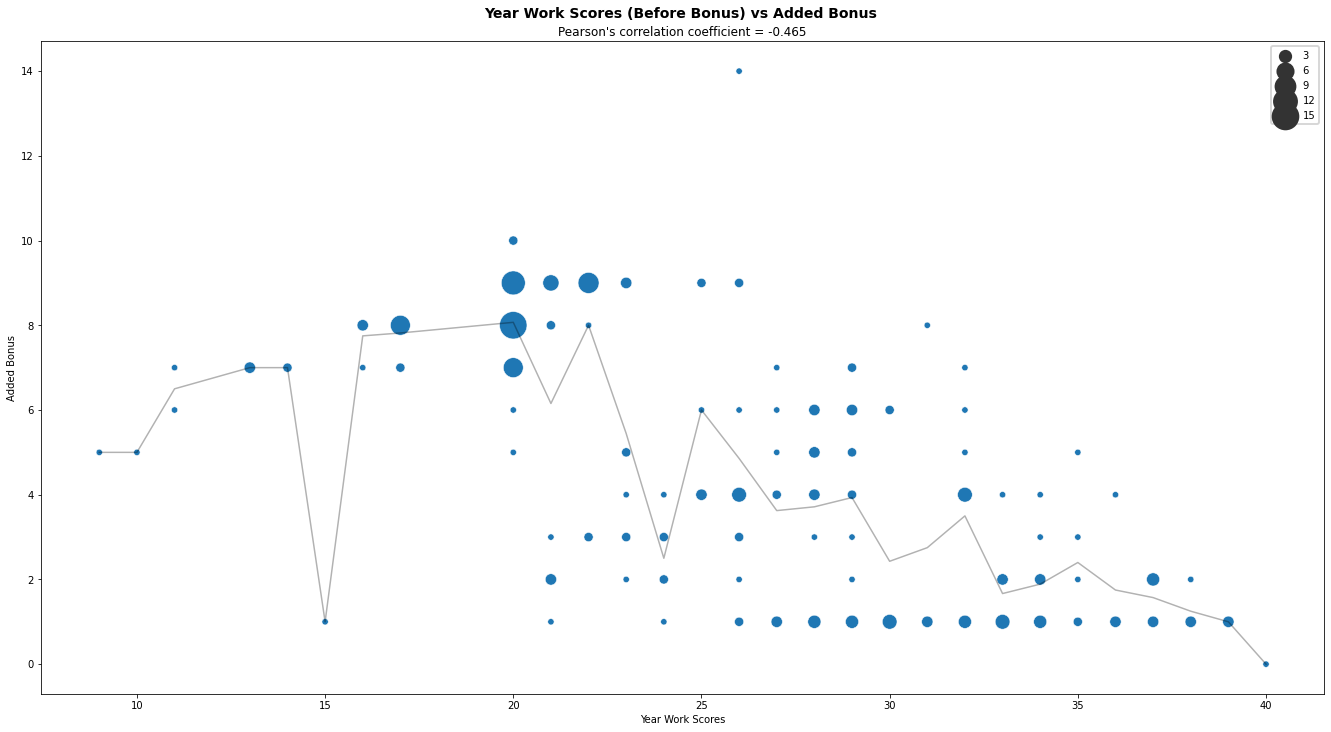

In [25]:
corr = np.corrcoef(TOT_bonus.TOT, TOT_bonus.bonus)
corr = corr[0][1]

figure = plt.figure(figsize=(23,12))
_ = sns.scatterplot(data= TOT_bonus, x='TOT', y='bonus', size='Number of students', sizes=(40,750))
_ = sns.lineplot(data= TOT_b_mean, x='TOT', y='bonus', color='black', alpha=0.3)
plt.xlabel('Year Work Scores')
plt.ylabel('Added Bonus')
_ = plt.suptitle("Year Work Scores (Before Bonus) vs Added Bonus", fontweight='bold', fontsize=14, x=0.51105, y=0.92)
_ = plt.title("Pearson's correlation coefficient = {:.3f}".format(corr))

### *Midterm scores vs bonus*

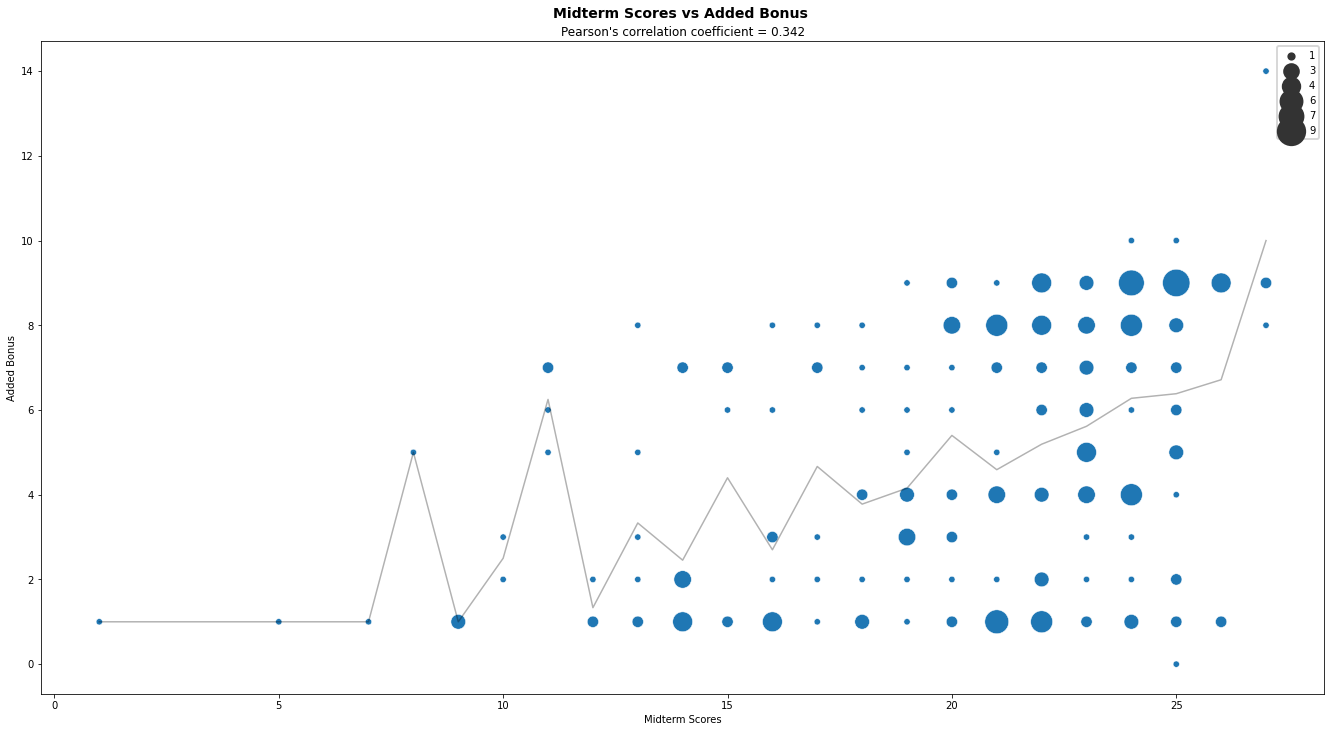

In [26]:
corr = np.corrcoef(mid_bonus.MID, mid_bonus.bonus)
corr = corr[0][1]

figure = plt.figure(figsize=(23,12))
_ = sns.scatterplot(data= mid_bonus, x='MID', y='bonus', size='Number of students', sizes=(40,750))
_ = sns.lineplot(data= mid_b_mean, x='MID', y='bonus', color='black', alpha=0.3)
plt.xlabel('Midterm Scores')
plt.ylabel('Added Bonus')
_ = plt.suptitle("Midterm Scores vs Added Bonus", fontweight='bold', fontsize=14, x=0.51105, y=0.92)
_ = plt.title("Pearson's correlation coefficient = {:.3f}".format(corr))

### *Difference in Year Work & Midterm scores vs Bonus*

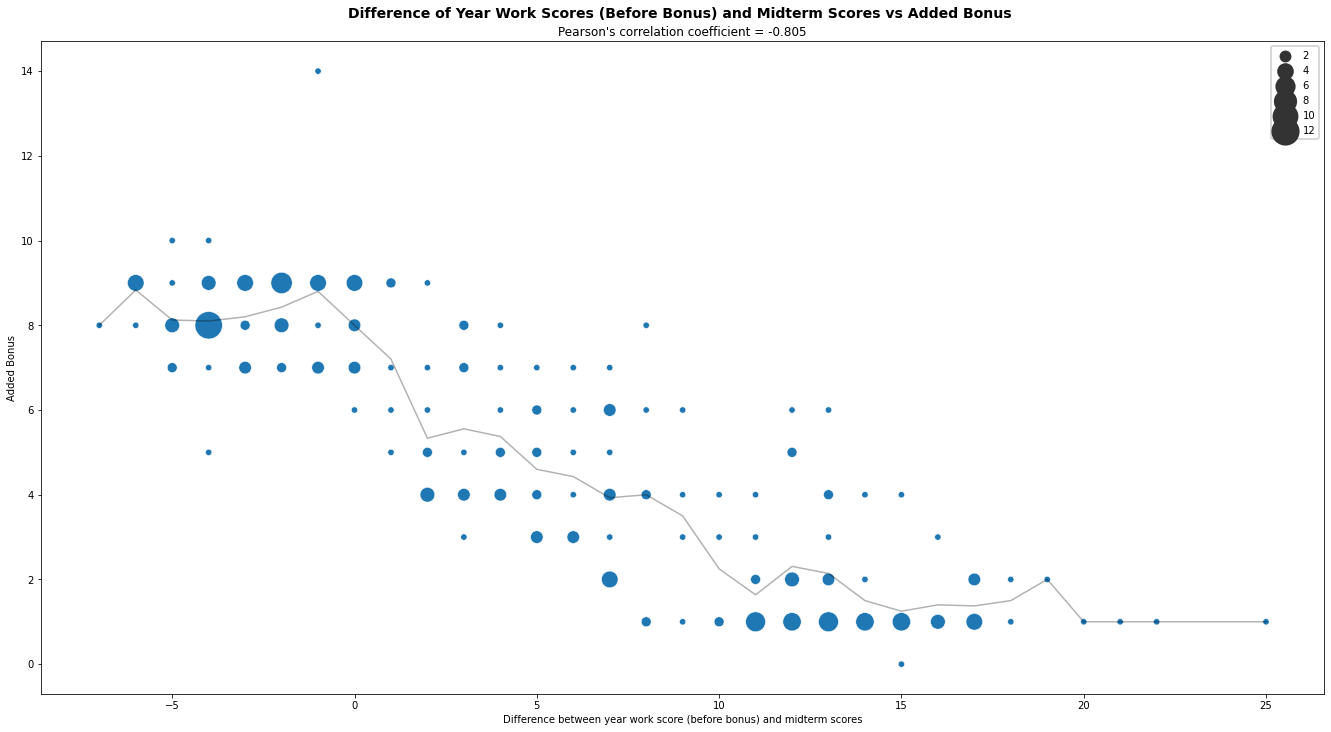

In [27]:
corr = np.corrcoef(diff_bonus['diff'], diff_bonus.bonus)
corr = corr[0][1]

figure = plt.figure(figsize=(23,12))
_ = sns.scatterplot(data= diff_bonus, x='diff', y='bonus', size='Number of students', sizes=(40,750))
_ = sns.lineplot(data= diff_b_mean, x='diff', y='bonus', color='black', alpha=0.3)
plt.xlabel('Difference between year work score (before bonus) and midterm scores')
plt.ylabel('Added Bonus')
_ = plt.suptitle("Difference of Year Work Scores (Before Bonus) and Midterm Scores vs Added Bonus", fontweight='bold', fontsize=14, x=0.51105, y=0.92)
_ = plt.title("Pearson's correlation coefficient = {:.3f}".format(corr))

## *Ideal Situation*

In [72]:
ideal = students['MID'] + 10
ideal.describe()

count    231.000000
mean      30.320346
std        4.641165
min       11.000000
25%       28.000000
50%       32.000000
75%       34.000000
max       37.000000
Name: MID, dtype: float64

In [73]:
difs = ideal - students['NEW_TOT']
len(difs[difs > 0]) / len(students) * 100

50.21645021645021

In [120]:
difs_tot = ideal - students['TOT']
len(difs_tot[difs_tot > 0]) / len(students) * 100

66.23376623376623

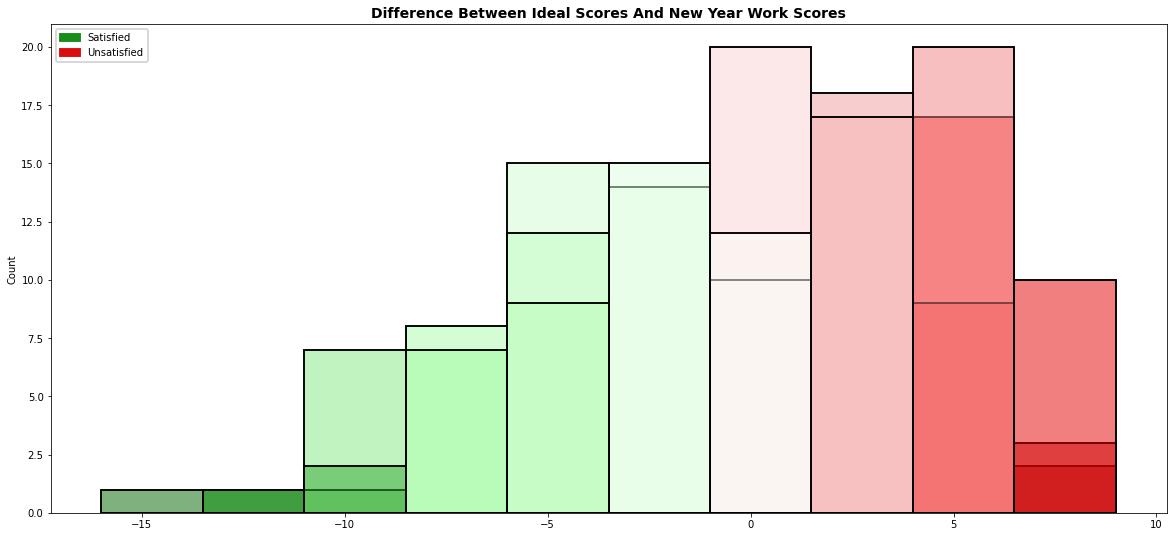

In [118]:
from  matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches

green_patch = mpatches.Patch(color='#1a8c1b', label='Satisfied')
red_patch = mpatches.Patch(color='#da0e0f', label='Unsatisfied')

c = ["darkred","red","lightcoral","white", "palegreen","green","darkgreen"]
c.reverse()
v = [0, .15, .3, .62, 0.8, .9, 1]
l = list(zip(v,c))
cmap=LinearSegmentedColormap.from_list('rg',l, N=256)

plt.figure(figsize=(20,9))
_ = sns.histplot(x= difs, hue=difs, stat='count', palette=cmap)
_ = plt.title('Difference Between Ideal Scores And New Year Work Scores', fontweight= 'bold', fontsize= 14)
_ = plt.legend(handles=[green_patch, red_patch], loc='upper left')

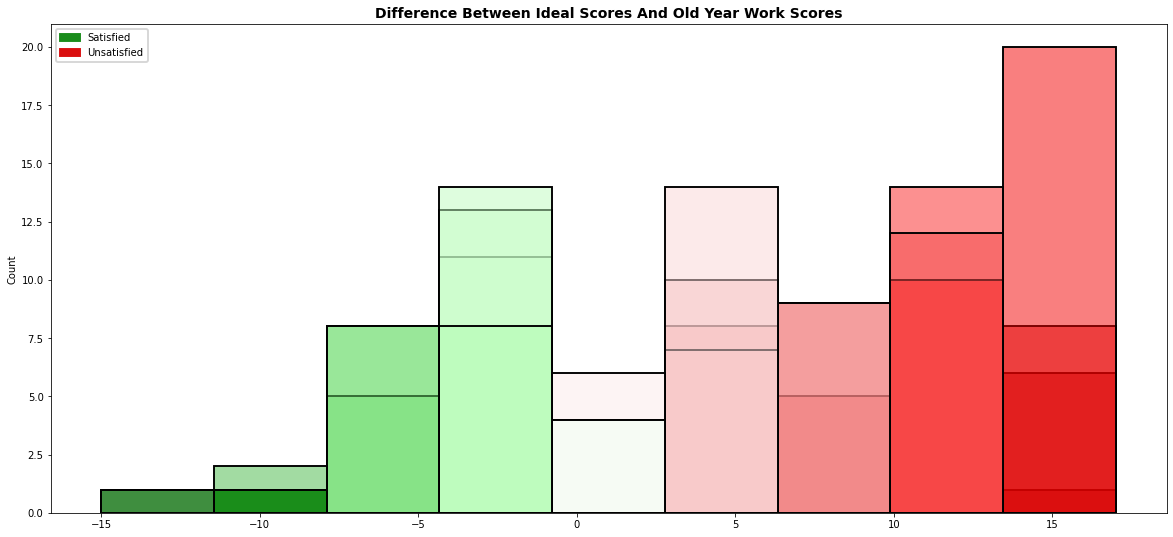

In [119]:
c = ["darkred","red","lightcoral","white", "palegreen","green","darkgreen"]
c.reverse()
v = [0, .15, .3, .5, 0.7, .9, 1]
l = list(zip(v,c))
cmap=LinearSegmentedColormap.from_list('rg',l, N=256)

plt.figure(figsize=(20,9))
_ = sns.histplot(x= difs_tot, hue=difs_tot, stat='count', palette=cmap)
_ = plt.title('Difference Between Ideal Scores And Old Year Work Scores', fontweight= 'bold', fontsize= 14)
_ = plt.legend(handles=[green_patch, red_patch], loc='upper left')